In [58]:
import pandas as pd
from collections import defaultdict

def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df





sentences = ['I like Deep Learning',
             'I like NLP',
             #'Deep Learning I love'
             'I enjoy flying']
              
window_sz = 2

co_occur_df = co_occurrence(sentences,window_sz)
co_occur_df

,deep,enjoy,flying,i,learning,like,nlp
deep,0,0,0,1,1,1,0
enjoy,0,0,1,1,0,0,0
flying,0,1,0,1,0,0,0
i,1,1,1,0,0,2,1
learning,1,0,0,0,0,1,0
like,1,0,0,2,1,0,1
nlp,0,0,0,1,0,1,0


In [59]:
co_occur_values = co_occur_df.values
co_occur_values

array([[0, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 2, 1],
       [1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 2, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0]], dtype=int16)

In [62]:
import numpy as np

la = np.linalg
U,s,Vh = la.svd(co_occur_values, full_matrices = False)
print('Co-occurance matrix shape:', co_occur_values.shape)
print('U','\n',U.shape)
print('s','\n',s.shape)
print('Vh','\n',Vh.shape)

Co-occurance matrix shape: (7, 7)
U 
 (7, 7)
s 
 (7,)
Vh 
 (7, 7)


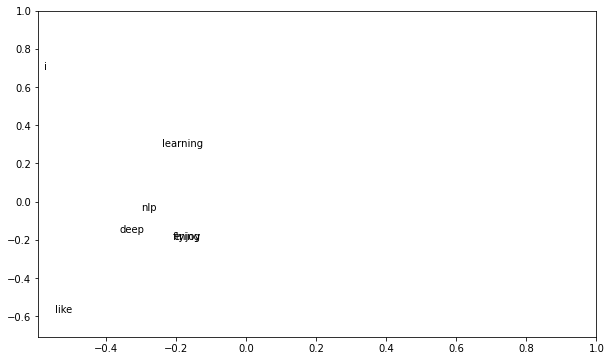

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for i in range(len(co_occur_df.columns)):
  plt.text(U[i,0], U[i,1], co_occur_df.index[i])
  plt.xlim(U[0].min(),1)  #plt.ylim(U[0].min(), U[0].max())
  plt.ylim(U[1].min(),1)  #plt.xlim(U[1].min(), U[1].max())

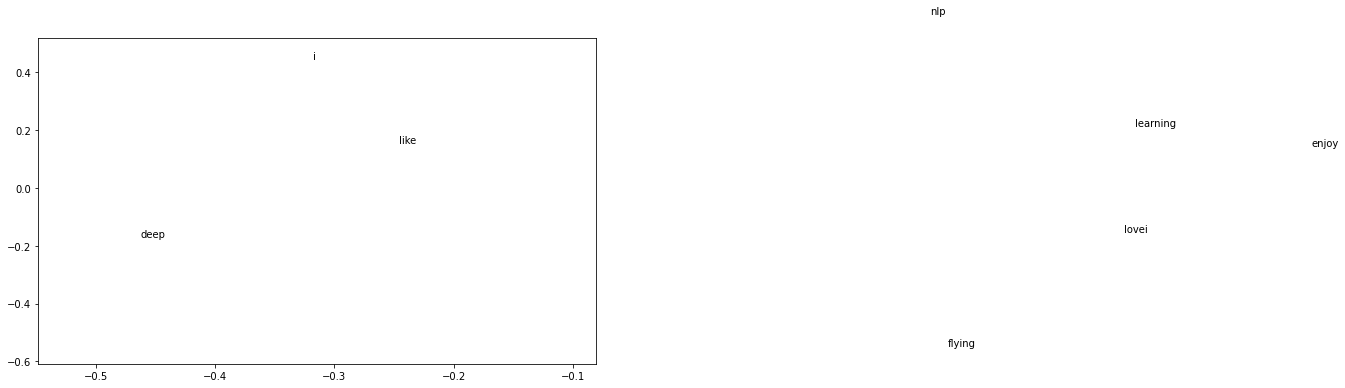

In [51]:
plt.figure(figsize=(10,6))
for i in range(len(co_occur_df.columns)):
  plt.text(Vh[i,0], Vh[i,1], co_occur_df.columns[i])
  plt.xlim(Vh[0].min(), Vh[0].max())
  plt.ylim(Vh[1].min(), Vh[1].max())